<a href="https://colab.research.google.com/github/meafaidzha18/Tugas-PBO/blob/main/BismillahSkripsiFIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from wordcloud import WordCloud
from google.colab import files

In [2]:
uploaded = files.upload()

Saving DATA CODINGAN.xlsx to DATA CODINGAN.xlsx


In [9]:
df = pd.read_excel('DATA CODINGAN.xlsx')
df

,ID,Usia,DurasiSkripsi,DurasiMusik,Skala Before,Skala After,Tingkat Stress Skripsi,Perasaan Setelah,Pengaruh Musik pada Skripsi,Jenis Musik
0,Q1,24,1jam,1jam,5,2,Cukup Stress,Tenang,Cukup berpengaruh,Jazz
1,Q2,21,1jam,1jam,2,2,Sedikit Stress,Mood,Cukup berpengaruh,Pop
2,Q3,21,1jam,1jam,1,1,tidak Pernah,Good,Cukup berpengaruh,Instrumen
3,Q4,22,2jam,1jam,2,2,Sedikit Stress,Santai,Sangat berpengaruh,Jazz
4,Q5,22,1jam,1jam,3,2,Cukup Stress,Santai,Cukup berpengaruh,R&B
...,...,...,...,...,...,...,...,...,...,...
335,Q336,23,2jam,2jam,3,2,Stress,Santai,Cukup berpengaruh,Jazz
336,Q337,22,3jam,3jam,3,3,Sedikit Stres,Santai,Cukup berpengaruh,R&B
337,Q338,22,1jam,30menit,2,1,Sedikit Stres,Tenang,Cukup berpengaruh,Instrumen
338,Q339,22,3jam,3jam,4,3,Stress,Fokus,Tidak berpengaruh,Pop


In [10]:
df.shape

(340, 10)

In [11]:
df.columns


Index(['ID', 'Usia', 'DurasiSkripsi', 'DurasiMusik', 'Skala Before',
       'Skala After', 'Tingkat Stress Skripsi', 'Perasaan Setelah',
       'Pengaruh Musik pada Skripsi', 'Jenis Musik'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           340 non-null    object
 1   Usia                         340 non-null    int64 
 2   DurasiSkripsi                340 non-null    object
 3   DurasiMusik                  340 non-null    object
 4   Skala Before                 340 non-null    int64 
 5   Skala After                  340 non-null    int64 
 6   Tingkat Stress Skripsi       340 non-null    object
 7   Perasaan Setelah             340 non-null    object
 8   Pengaruh Musik pada Skripsi  340 non-null    object
 9   Jenis Musik                  337 non-null    object
dtypes: int64(3), object(7)
memory usage: 26.7+ KB


In [12]:
df.describe()

,Usia,Skala Before,Skala After
count,340.000000,340.000000,340.000000
mean,21.629412,3.191176,1.867647
std,0.887983,1.555818,0.746761
min,19.000000,1.000000,1.000000
25%,21.000000,2.000000,1.000000
50%,22.000000,3.000000,2.000000
75%,22.000000,4.000000,2.000000
max,24.000000,25.000000,4.000000


In [13]:
df.duplicated().sum()

0

In [14]:
# Menghapus baris dengan nilai kosong
df_cleaned = df.dropna()

In [15]:
df.isnull().sum()

,0
ID,0
Usia,0
DurasiSkripsi,0
DurasiMusik,0
Skala Before,0
Skala After,0
Tingkat Stress Skripsi,0
Perasaan Setelah,0
Pengaruh Musik pada Skripsi,0
Jenis Musik,3


In [16]:
kolom_yang_tidak_digunakan = ['ID', 'Usia']  # Sesuaikan dengan nama kolom yang tidak dibutuhkan

# Menghapus kolom yang tidak digunakan
df = df.drop(columns=kolom_yang_tidak_digunakan)

# Menampilkan DataFrame setelah kolom dihapus
print(df.head())

  DurasiSkripsi DurasiMusik  Skala Before  Skala After Tingkat Stress Skripsi  \
0          1jam        1jam             5            2           Cukup Stress   
1          1jam        1jam             2            2         Sedikit Stress   
2          1jam        1jam             1            1           tidak Pernah   
3          2jam        1jam             2            2         Sedikit Stress   
4          1jam        1jam             3            2           Cukup Stress   

  Perasaan Setelah Pengaruh Musik pada Skripsi Jenis Musik  
0           Tenang           Cukup berpengaruh        Jazz  
1             Mood           Cukup berpengaruh         Pop  
2             Good           Cukup berpengaruh   Instrumen  
3           Santai          Sangat berpengaruh        Jazz  
4           Santai           Cukup berpengaruh         R&B  


In [17]:
pengaruh_musik_stresdf = df[[ 'DurasiSkripsi', 'DurasiMusik', 'Skala Before',
       'Skala After', 'Tingkat Stress Skripsi', 'Perasaan Setelah',
       'Pengaruh Musik pada Skripsi', 'Jenis Musik']]
pengaruh_musik = pengaruh_musik_stresdf.copy()
print('Data yang akan diprediksi :', pengaruh_musik.shape[0])

Data yang akan diprediksi : 340


In [18]:
# Menghitung Penurunan Stres sebagai label
df['Penurunan Stres'] = df['Skala Before'] - df['Skala After']

# Memilih fitur (X) dan label (y)
X = df[[ 'DurasiSkripsi', 'DurasiMusik', 'Skala Before',
       'Skala After', 'Tingkat Stress Skripsi', 'Perasaan Setelah',
       'Pengaruh Musik pada Skripsi', 'Jenis Musik']]
y = df['Penurunan Stres']

# Mengonversi fitur kategorikal menjadi numerik jika ada kolom kategorikal seperti 'Jenis Musik'
X = pd.get_dummies(X, drop_first=True)

In [19]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Memeriksa bentuk data latih dan data uji
print(f"Data latih: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Data uji: X_test: {X_test.shape}, y_test: {y_test.shape}")

Data latih: X_train: (204, 83), y_train: (204,)
Data uji: X_test: (136, 83), y_test: (136,)


In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Menghitung akurasi SVM
akurasi_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi Model SVM:", akurasi_svm)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM:\n", classification_report(y_test, y_pred_svm))

# Menampilkan confusion matrix
print("Confusion Matrix SVM:\n", confusion_matrix(y_test, y_pred_svm))

Akurasi Model SVM: 0.9779411764705882
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

          -1       1.00      0.75      0.86         4
           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        32
           3       0.90      0.90      0.90        10
           4       0.50      0.50      0.50         2

    accuracy                           0.98       136
   macro avg       0.89      0.86      0.87       136
weighted avg       0.98      0.98      0.98       136

Confusion Matrix SVM:
 [[ 3  1  0  0  0  0]
 [ 0 27  0  0  0  0]
 [ 0  0 61  0  0  0]
 [ 0  0  0 32  0  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  1  1]]


In [24]:
# Menghitung akurasi RF
akurasi_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Model Random Forest:", akurasi_rf)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_pred_rf))

# Menampilkan confusion matrix
print("Confusion Matrix Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Akurasi Model Random Forest: 0.8014705882352942
Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           0       0.67      0.81      0.73        27
           1       0.88      0.82      0.85        61
           2       0.88      0.88      0.88        32
           3       0.62      0.80      0.70        10
           4       0.00      0.00      0.00         2

    accuracy                           0.80       136
   macro avg       0.67      0.59      0.59       136
weighted avg       0.81      0.80      0.79       136

Confusion Matrix Random Forest:
 [[ 1  3  0  0  0  0]
 [ 0 22  5  0  0  0]
 [ 0  8 50  1  2  0]
 [ 0  0  2 28  2  0]
 [ 0  0  0  2  8  0]
 [ 0  0  0  1  1  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


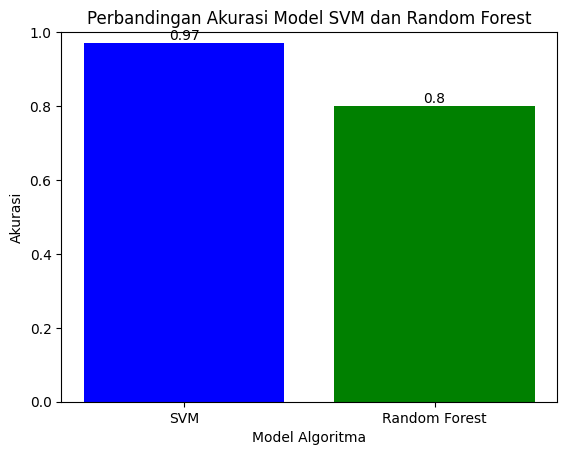

In [25]:
# Data akurasi untuk kedua model
models = ['SVM', 'Random Forest']
accuracies = [0.97, 0.80]

# Membuat diagram batang
plt.bar(models, accuracies, color=['blue', 'green'])

# Menambahkan judul dan label
plt.title('Perbandingan Akurasi Model SVM dan Random Forest')
plt.xlabel('Model Algoritma')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas batang
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), ha='center')

# Menampilkan diagram
plt.ylim(0, 1)  # Mengatur skala y dari 0 sampai 1
plt.show()


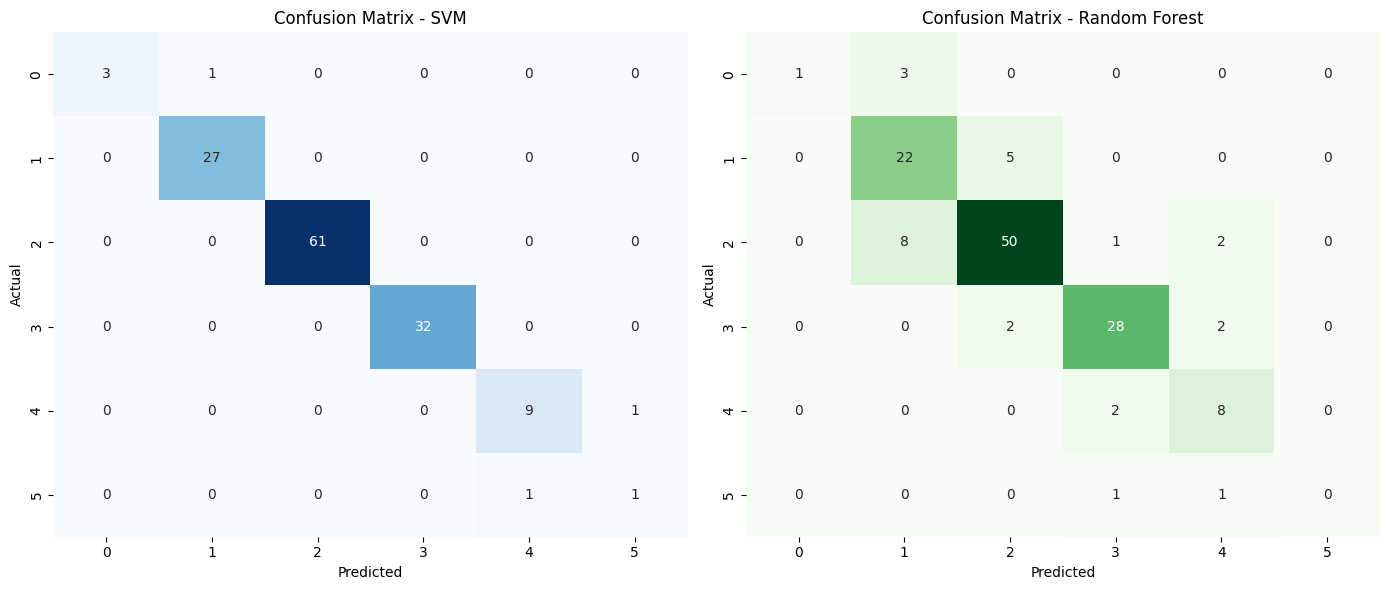

In [26]:
# Prediksi dengan model SVM
y_pred_svm = svm_model.predict(X_test)

# Prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Membuat confusion matrix untuk kedua model
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Membuat confusion matrix untuk kedua model
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Mengatur ukuran plot
plt.figure(figsize=(14, 6))

# Heatmap untuk Confusion Matrix SVM
plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmap untuk Confusion Matrix Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.tight_layout()
plt.show()

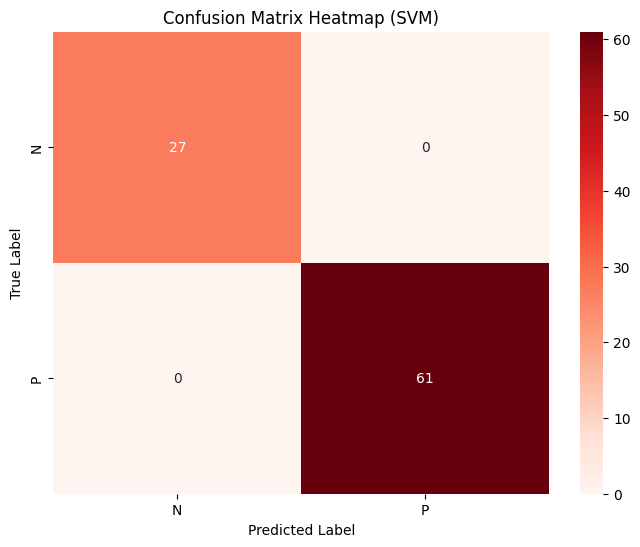

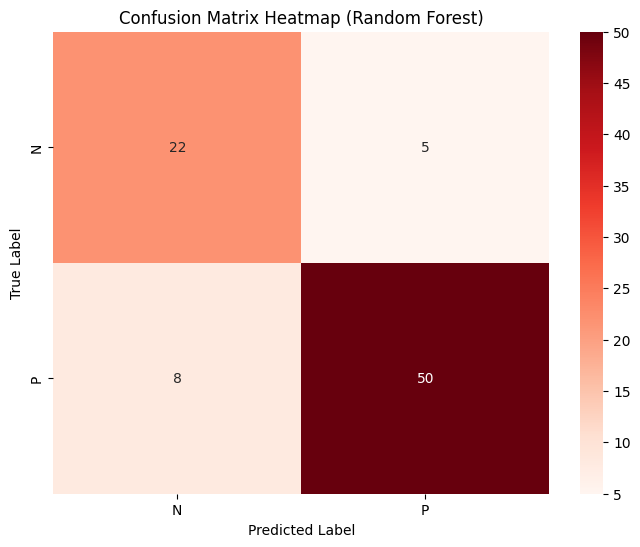

In [27]:
# Function to plot confusion matrix SVM
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming binary classification (0, 1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['N', 'P'], yticklabels=['N', 'P'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, 'Confusion Matrix Heatmap (SVM)')

# Function to plot confusion matrix RF
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming binary classification (0, 1) #Fixed: Changed y_pred_binary to y_pred to use the provided prediction values
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['N', 'P'], yticklabels=['N', 'P'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix Heatmap (Random Forest)')

In [28]:
# Install library yang dibutuhkan
!pip install scikit-learn

# Import library yang diperlukan
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Membuat model SVM dan Random Forest
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Membuat StratifiedKFold untuk cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation untuk SVM
print("Cross-validation untuk SVM")
svm_scores = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')
print(f"Akurasi di setiap fold: {svm_scores}")
print(f"Rata-rata akurasi: {np.mean(svm_scores):.4f}")
print(f"Standard Deviasi: {np.std(svm_scores):.4f}\n")

# Cross-validation untuk Random Forest
print("Cross-validation untuk Random Forest")
rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
print(f"Akurasi di setiap fold: {rf_scores}")
print(f"Rata-rata akurasi: {np.mean(rf_scores):.4f}")
print(f"Standard Deviasi: {np.std(rf_scores):.4f}")

Cross-validation untuk SVM
Akurasi di setiap fold: [1.         0.98529412 0.98529412 0.98529412 0.97058824]
Rata-rata akurasi: 0.9853
Standard Deviasi: 0.0093

Cross-validation untuk Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Akurasi di setiap fold: [0.88235294 0.85294118 0.86764706 0.79411765 0.82352941]
Rata-rata akurasi: 0.8441
Standard Deviasi: 0.0317


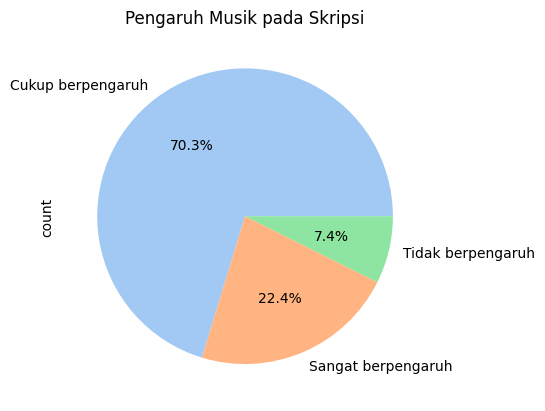

In [33]:
sns.set_palette('pastel')
df['Pengaruh Musik pada Skripsi'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pengaruh Musik pada Skripsi')
plt.show()

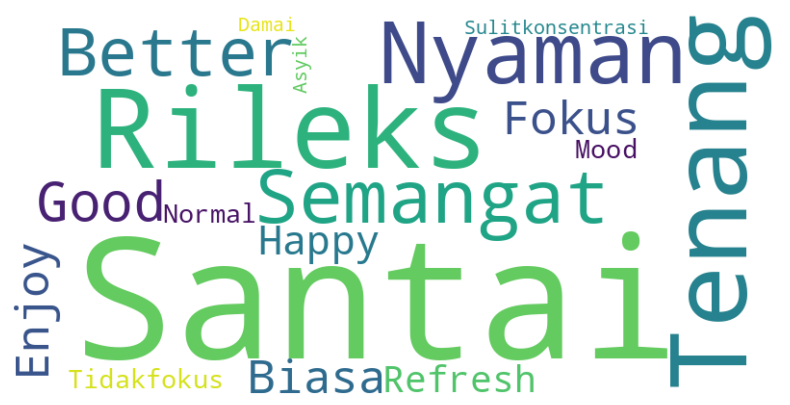

In [36]:
# Assuming 'pengaruh_musik_stresdf' still contains 'Perasaan Setelah'
df = pd.concat([df, pengaruh_musik_stresdf[['Perasaan Setelah']]], axis=1)

# Now you can proceed with your wordcloud generation
text = ' '.join(df['Perasaan Setelah'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

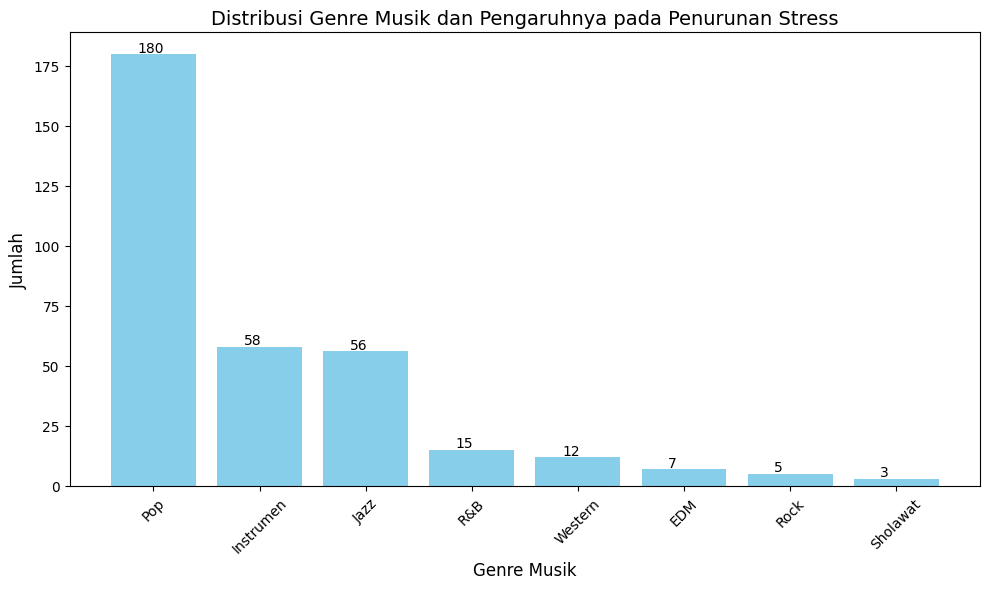

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data (masukkan data asli Anda di sini)
data = {
    'Genre': ['Pop', 'Jazz', 'Instrumen', 'R&B', 'Western', 'EDM', 'Rock', 'Sholawat', ],
    'Jumlah': [180, 56, 58, 15, 12, 7, 5, 3,]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Kelompokkan data berdasarkan Genre dan jumlahkan
grouped_data = df.groupby('Genre')['Jumlah'].sum().reset_index()

# Sort data berdasarkan jumlah (opsional)
grouped_data = grouped_data.sort_values(by='Jumlah', ascending=False)

# Plot diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Genre'], grouped_data['Jumlah'], color='skyblue')

# Tambahkan angka di atas batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(bar.get_height()), fontsize=10)

# Judul dan label
plt.title('Distribusi Genre Musik dan Pengaruhnya pada Penurunan Stress', fontsize=14)
plt.xlabel('Genre Musik', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [ ]:
f